In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv',nrows=10000)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            10000 non-null  int64 
 1   qid1          10000 non-null  int64 
 2   qid2          10000 non-null  int64 
 3   question1     10000 non-null  object
 4   question2     10000 non-null  object
 5   is_duplicate  10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    6289
1    3711
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


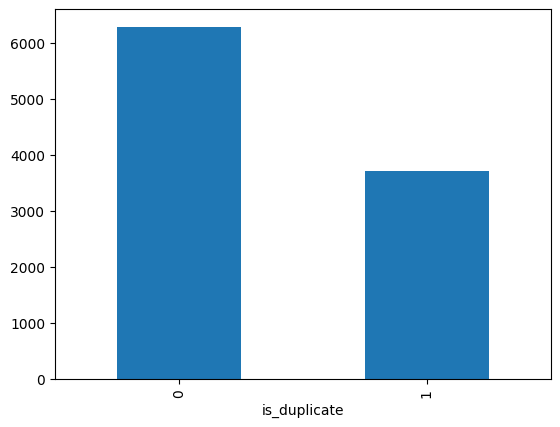

In [8]:
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts().plot(kind='bar'))

In [9]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Unique Questions:",np.unique(qid).shape[0])
print("Repeated Questions",qid.value_counts()[qid.value_counts()>1].shape[0])


Unique Questions: 19413
Repeated Questions 536


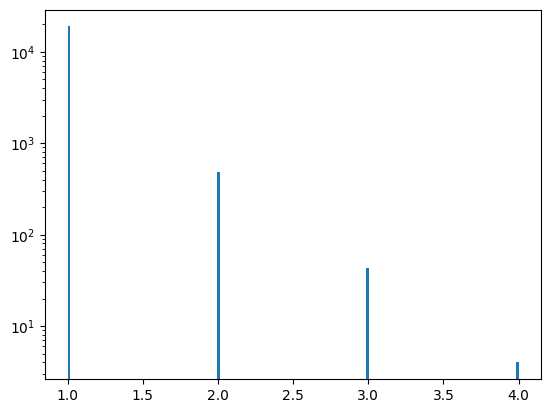

In [10]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
#Addding character length of questions
df['q1_len']=(df['question1']).str.len()
df['q2_len']=(df['question2']).str.len()
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [ ]:
#Adding Word length of questions
df['q1_words']=df['question1'].apply(lambda x: len(str(x).split(" ")))
df['q2_words']=df['question2'].apply(lambda x: len(str(x).split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [15]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [16]:
df['common_words']=df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [17]:
def words_total(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1) + len(w2)

In [18]:
df['total_words']=df.apply(words_total,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [20]:
df['word_share']=round(df['common_words']/df['total_words'],3)
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
6300,6300,12349,12350,"""How do I get rid of acne and acne…?",How do I get rid of acne naturally?,1,36,35,9,8,6,17,0.353
6161,6161,12078,12079,Why is Overwatch so popular?,How did Overwatch become so successful so quic...,1,28,50,5,8,2,12,0.167
6347,6347,12439,12440,Is muhammed a true prophet?,God descends to protect men. Dr. Ambedkar eman...,0,27,100,5,16,2,20,0.100
9923,9923,19269,19270,How can I prepare myself for GSoC 2017 in thre...,How should I prepare for GSoc 2017?,1,55,35,11,7,5,18,0.278
980,980,1955,1956,What can I do to get a job at Microsoft?,How do I get job in Google or Microsoft?,1,40,40,10,9,5,19,0.263
3161,3161,6266,6267,Why did Harry Potter name his daughter after L...,What happened to Luna Lovegood after Book 7?,0,59,44,10,8,2,18,0.111
3257,3257,6456,6457,I am electronics & communication engineer. I a...,Is it better to stick with a bachelor of diete...,0,112,100,19,19,0,30,0.000
1927,1927,3835,3836,Why is Vermont so liberal?,Is there any culture in Vermont?,0,26,32,5,6,1,11,0.091
3416,3416,6771,6772,Can any one suggest the best foods for gaining...,Which is the best food to gain weight?,1,54,38,10,8,3,18,0.167
3947,3947,7818,7819,What are some good colleges under SNAP accepti...,Has anyone on Quora ever done poorly in high s...,0,63,94,10,18,1,28,0.036


Maximum words in question: 66
Minimum words in question: 1
Average words in question: 10


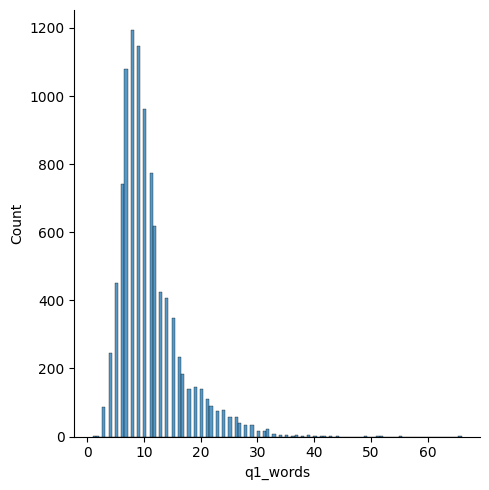

In [25]:
sns.displot(df['q1_words'])
print('Maximum words in question:',df['q1_words'].max())
print('Minimum words in question:',df['q1_words'].min())
print('Average words in question:',int(df['q1_words'].mean()))

Maximum words in question: 228
Minimum words in question: 3
Average words in question: 11


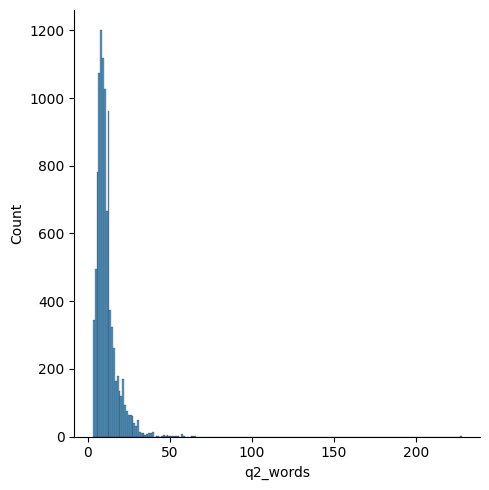

In [26]:
sns.displot(df['q2_words'])
print('Maximum words in question:',df['q2_words'].max())
print('Minimum words in question:',df['q2_words'].min())
print('Average words in question:',int(df['q2_words'].mean()))

C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_16876\3272773339.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


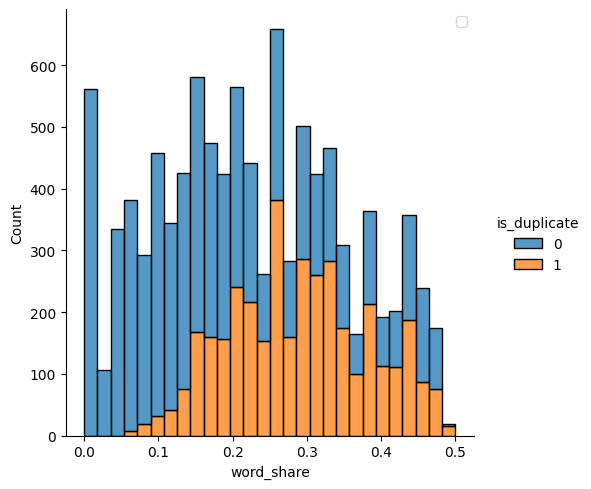

In [33]:
sns.displot(data=df,x=df['word_share'],hue='is_duplicate',multiple='stack')
plt.legend()
plt.show()

C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_16876\2632395451.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


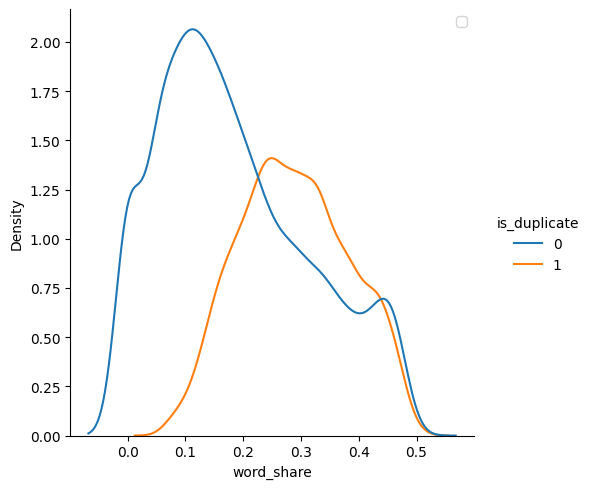

In [35]:
sns.displot(data=df,x=df['word_share'],hue='is_duplicate',kind='kde')
plt.legend()
plt.show()

C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_16876\3494516031.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


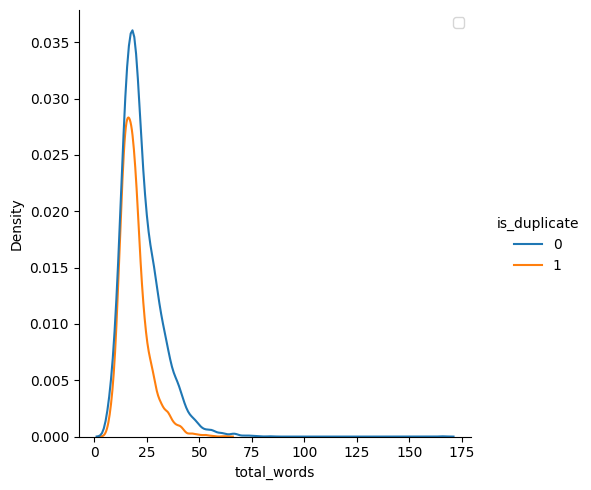

In [36]:
sns.displot(data=df,x=df['total_words'],hue='is_duplicate',kind='kde')
plt.legend()
plt.show()

In [37]:
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [54]:
features_df=df.drop(['id','qid1','qid2','question1','question2'],axis=1)
features_df.head()

,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
0,0,66,57,14,12,10,23,0.435
1,0,51,88,8,13,4,20,0.200
2,0,73,59,14,10,4,24,0.167
3,0,50,65,11,9,0,19,0.000
4,0,76,39,13,7,2,20,0.100


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,ngram_range=(1,1))
q1=cv.fit_transform(ques_df['question1']).toarray()
q2=cv.transform(ques_df['question2']).toarray()

In [78]:
temp_df1 = pd.DataFrame(q1, index= ques_df.index)
temp_df2 = pd.DataFrame(q2, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(10000, 12000)

In [79]:
final_df=pd.concat([temp_df,features_df],axis=1)
final_df.head()

MemoryError: Unable to allocate 916. MiB for an array with shape (12000, 10000) and data type int64

In [ ]:
final_df.shape

(10000, 16008)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_df.drop('is_duplicate',axis=1).values,final_df['is_duplicate'].values,test_size=0.2,random_state=1)

In [ ]:
x_train[0]

array([ 0.   ,  0.   ,  0.   , ...,  3.   , 16.   ,  0.188],
      shape=(16007,))

In [ ]:
y_train[0]

np.int64(0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.727

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.747